# Resolving the Schrödinger's Cat Paradox with Quantum Circuits 

Welcome to the code tutorial for the "Schrödinger's cat" installment of the Paradoxes series on the Qiskit YouTube channel.

In this tutorial, we’ll help you develop a better understanding of Schrödinger’s famous thought experiment using quantum circuits built with Qiskit! 

If you haven't already, I recommend you first watch [our video](https://youtu.be/sBtAe8BsOhA) on the Qiskit YouTube channel, which provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (coming soon on the [Qiskit medium](https://medium.com/qiskit) for a deeper look at the background of the thought experiment. 

If you haven’t had a chance to review those materials, or if you need a refresher, here’s a quick summary the Schrödinger's cat thought experiment:  

**Schrödinger's cat**

In the original paradox, we imagine a cat located inside a box alongside a vial of poison, a small hammer and a radioactive atom. If the atom decays, it will trigger the hammer to smash open the vial of poison and the cat will die. If the atom does not decay, the hammer will not smash open the vial of poison and the cat will stay alive. 

This scenario gets interesting if the atom is in a quantum superposition of decaying and not decaying. Then quantum mechanics says that the atom and the cat become quantum entangled, entering into a joint superposition of two states. In one state, the atom has decayed and the cat is dead. In the other, the atom has not decayed and the cat is alive. In this scenario, the box contains a cat that is in a superposition of being alive and dead at the same time. 

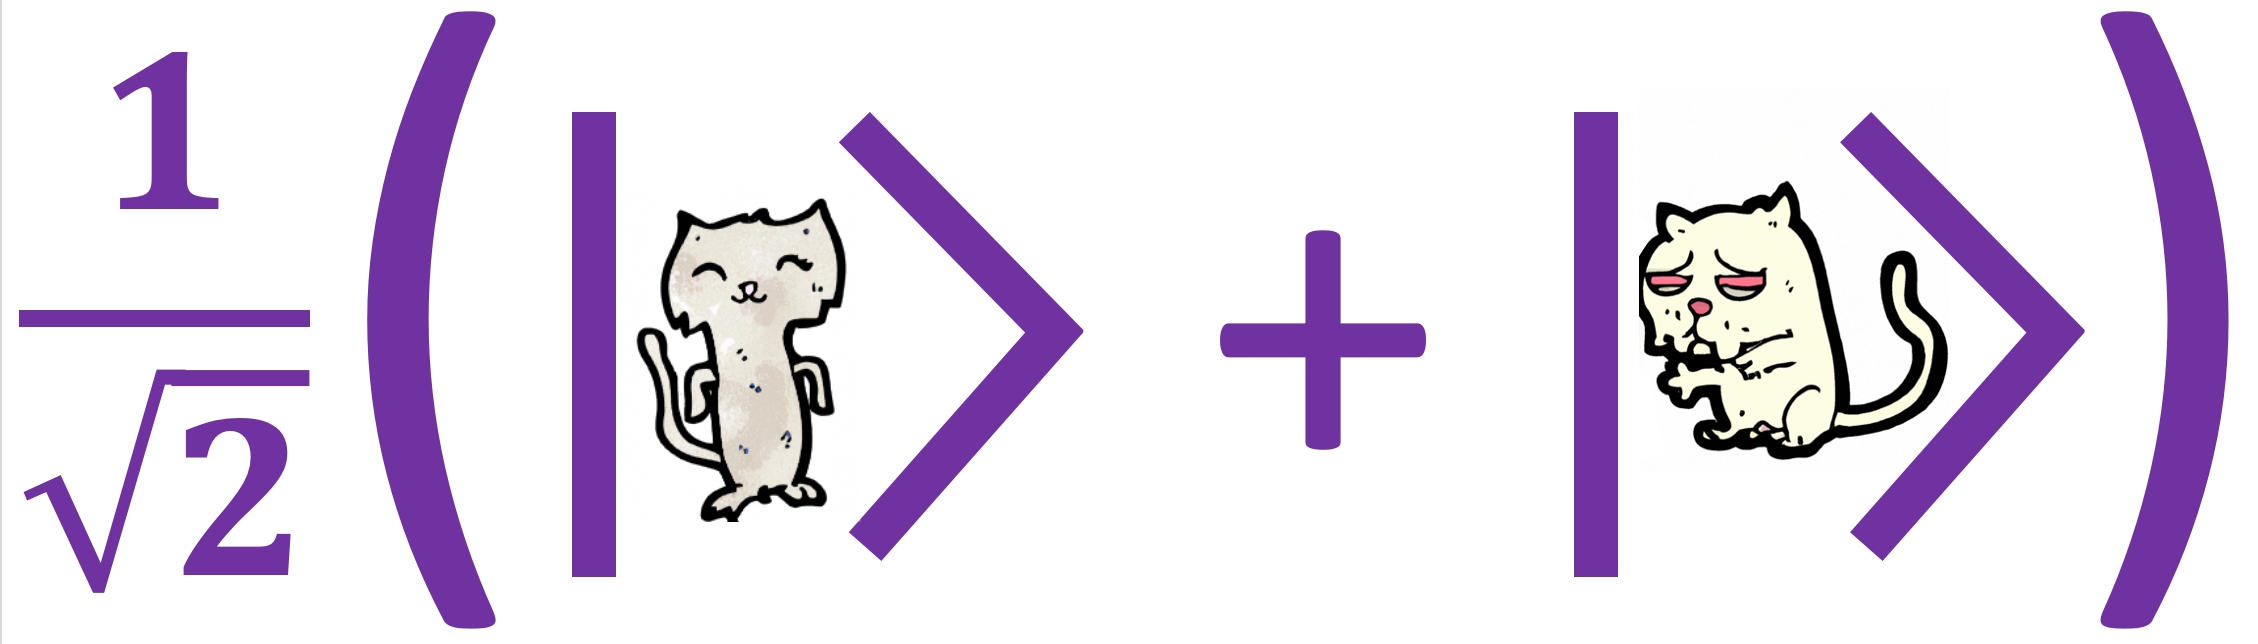

**Schrödinger's cat as a quantum circuit**

I'm going to present each part of the Schrodinger's cat thought experiment using quantum gates and qubits, so we can better understand what's going on. If you're not familiar with qubits and quantum gates like Hadamard and CNOT, then I strongly recommend taking a look at the "Introduction to Quantum Computing" course in the [Qiskit textbook](https://learn.qiskit.org/course/introduction/why-quantum-computing) before continuing. 

First, I’ll use a qubit to represent our radioactive atom. Our atom needs to be in a superposition of two states, decayed or not decayed. So let's put our qubit into an equal quantum superposition 
of |0⟩ and |1⟩, by putting it into the |+⟩ state. We can do this by starting our qubit in the |0⟩ state, then applying the Hadamard gate: 

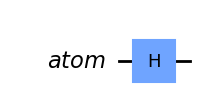

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr_atom = QuantumRegister(1, name="atom")

qc = QuantumCircuit(qr_atom)

qc.h(qr_atom[0])

qc.draw("mpl")

The Hadamard gate acts on a qubit in the |0⟩ state as follows: 

$$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Let's add a measurement at the end and run the circuit:

In [2]:
qc.measure_all()

from qiskit_aer import AerSimulator 
backend = AerSimulator()
result = backend.run(qc).result()

print(result.get_counts())

{'0': 523, '1': 501}


We see that half the time we get zero when we measure our qubit, and half the time we get one. 

Now let's introduce a second qubit to represent the cat inside the box. To represent the cat interacting with the radioactive atom, we will use a CNOT gate. If the atom is |0⟩, undecayed, then the cat qubit will stay |0⟩, meaning it stays alive. If the atom is |1⟩, decayed, then the cat qubit will be flipped to |1⟩, meaning it becomes dead. 

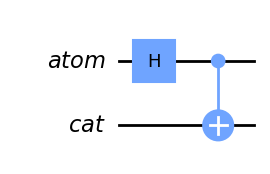

In [3]:
qr_cat = QuantumRegister(1, name="cat")
qc = QuantumCircuit(qr_atom, qr_cat)

qc.h(qr_atom[0])

qc.cx(qr_atom[0], qr_cat[0])

qc.draw("mpl")

The CNOT gate acts on the atom and cat qubits as follows: 

$$CNOT\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

Here we are imagining that the cat's observation of the atom does not cause an irreversible collapse. Instead, the cat is a quantum system that becomes entangled with the atom, and enters a quantum superposition of being alive with an undecayed atom and dead with a decayed atom.

Let's see the outcomes of adding measurements to the circuit and running it on the simulator: 

In [4]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())

{'00': 512, '11': 512}


The outcomes are always 00 or 11, showing that the cat's state is completely entangled with the atom's state. Now what happens if we look inside the box? We need to model our own observation of the cat. The "irreversible collapse" scientists will model our observation in a different way to the "no collapse" scientists. 

As we explain in the [video](https://youtu.be/sBtAe8BsOhA), there are two theories for what happens when an we observe the system, the “irreversible collapse” theory and the “no collapse” theory. We’ll have to model our observation of the system differently depending on which theory we subscribe to.  

The "collapse" version of looking inside the box is running the circuit with a measurement for a single shot (i.e. just a single run of the circuit): 

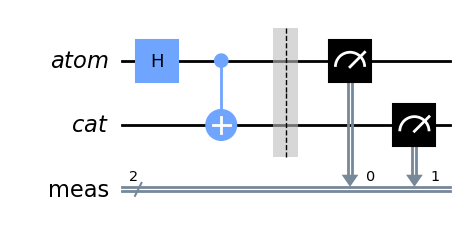

In [5]:
qc.draw("mpl")

In [6]:
result = backend.run(qc, shots=1).result()

print(result.get_counts())

{'00': 1}


In this case, the outcome was 0, so the cat collapsed to the alive state when we looked at it. If you run it yourself, sometimes the outcome will be 0 and sometimes it will be 1, indicating that the cat is dead. 

In the "no collapse" version, we can model ourselves as a quantum system, too. When we look inside the box, we become quantum entangled with the cat, and enter the entangled superposition. So, we'll introduce a third qubit to represent the observer's memory, and add a CNOT gate with the cat at the control and us as the target. The cat's status as alive or dead gets copied onto our memory: if it is 0 (alive) then we record 0 (alive) in our memory, and if it is 1 (dead) then we record 1 (dead) in our memory. This leads to the following quantum circuit:

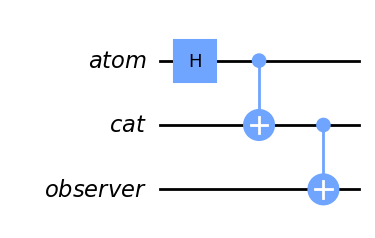

In [7]:
qr_observer = QuantumRegister(1, name="observer")
qc = QuantumCircuit(qr_atom, qr_cat, qr_observer)

qc.h(qr_atom[0])

qc.cx(qr_atom[0], qr_cat[0])

qc.cx(qr_cat[0], qr_observer[0])

qc.draw("mpl")

The three qubits — atom, cat and observer's memory — are now in a big entangled superposition:

$$\frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

The measurement outcomes are half the time 000 and half the time 111: 

In [8]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())

{'000': 523, '111': 501}


### Decoherence: the reason everyone agrees on a single outcome for the cat 
 
If the observer really is entering an entangled superposition, then why do they and the rest of the world around them only see one outcome? 

To understand this, I like to imagine the environment as a collection of dominoes. As soon as we knock over one domino, it triggers a chain reaction that spreads out across the entire set of dominoes, until all dominoes have been knocked over. Now imagine each domino represents a qubit, so the environment is a collection of qubits. When the first qubit gets the information about whether the cat is dead or alive, it then spreads to the next qubit and the next qubit. One by one, all the environment qubits join the giant entangled superposition, entering the overall state:

$$\frac{1}{\sqrt{2}}(|00...0\rangle + |11...1\rangle)$$

In the quantum circuit, we can represent this chain of passing on information about the cat from one qubit to another with a series of CNOT gates placed between the environment qubits: 

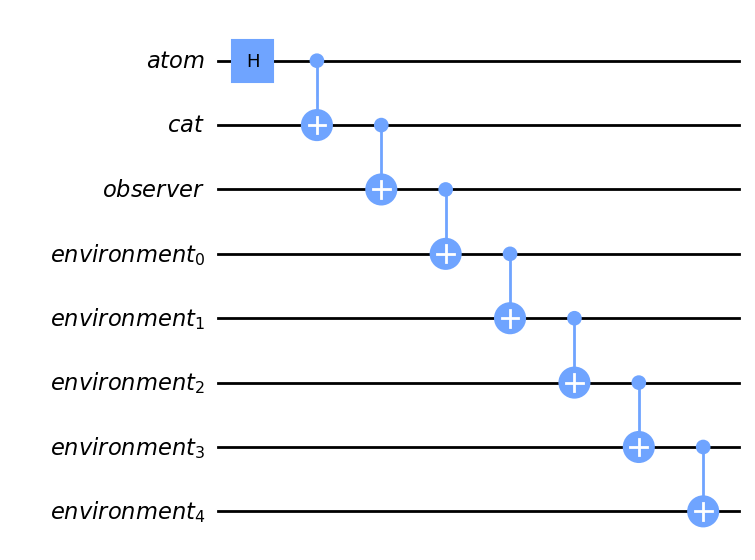

In [9]:
qr_env = QuantumRegister(5, name='environment')

qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env)

qc.h(qr_atom[0])

qc.cx(qr_atom, qr_cat)

qc.cx(qr_cat[0], qr_observer[0])

qc.cx(qr_observer, qr_env[0])
qc.cx(qr_env[0], qr_env[1])
qc.cx(qr_env[1], qr_env[2])
qc.cx(qr_env[2], qr_env[3])
qc.cx(qr_env[3], qr_env[4])

qc.draw("mpl")

Measuring these, we get the outcome:

In [10]:
qc.measure_all()

result = backend.run(qc).result()

print(result.get_counts())

{'00000000': 523, '11111111': 501}


In each branch of the superposition, the qubits are either all zero, or all one. In the Everettian theory of quantum mechanics, this means that the observer is either in a branch of the universe where they and everyone around them sees the cat being dead, or a branch where they and everyone around them sees the cat being alive. So even though the overall quantum state of the atom, cat, observer and environment is in a coherent superposition, the observer will only see a single outcome of their measurement, and the rest of the world around them will agree on the single outcome of that measurement. 

Now it's much easier to knock down all the dominoes than to stand them all back up. In a similar way, it's much easier for the information of a quantum system to be spread out across the environment than it is to erase it from the environment. This is why the cat becomes fixed into either the dead state or alive state. Without quantum control over the environment, not even the most powerful technology can disentangle the cat from its environment. 

We call this process decoherence, because the atom, cat and observer lose their quantum coherence once they interact with the environment. In general, for any environment over which we have no quantum, control measuring a system projects it into a single state, destroying its quantum coherence. 

Fighting the effects of decoherence is one of the key challenges of quantum computing. To preserve the coherent properties of quantum states that we use for processing quantum information, we want to keep them as isolated from the environment as possible. Once they interact with the environment, qubits decohere and become fixed into these separate branches, where they are either |0⟩ or |1⟩. 

Let's now modify the quantum circuit for the case where measurement instead causes an irreversible collapse. Somewhere along the chain of CNOTs, we must add an irreversible measurement. It might be when the cat measures the atom, or when the observer measures the cat, or somewhere else on the chain, depending on the explanation you use for the mechanism behind collapse. Here I've added barriers to show the different points on the circuit where the irreversible collapse could take place:

In [11]:
cr_atom = ClassicalRegister(1, name='c_atom')
cr_cat = ClassicalRegister(1, name='c_cat')
cr_observer = ClassicalRegister(1, name='c_observer')
cr_env = ClassicalRegister(5, name='c_environment')

qc = QuantumCircuit(qr_atom, qr_cat, qr_observer, qr_env, cr_atom, cr_cat, cr_observer, cr_env)

qc.h(qr_atom[0])

qc.barrier()
qc.measure(qr_atom[0], cr_atom[0])

qc.cx(qr_atom, qr_cat)

qc.barrier()
qc.measure(qr_cat[0], cr_cat[0])

qc.cx(qr_cat[0], qr_observer[0])

qc.barrier()
qc.measure(qr_observer[0], cr_observer[0])
qc.cx(qr_observer[0], qr_env[0])

for i in range(4):
    qc.barrier()
    qc.measure(qr_env[i], cr_env[i])  
    qc.cx(qr_env[i], qr_env[i+1])

qc.barrier()
qc.measure(qr_env[4], cr_env[4])

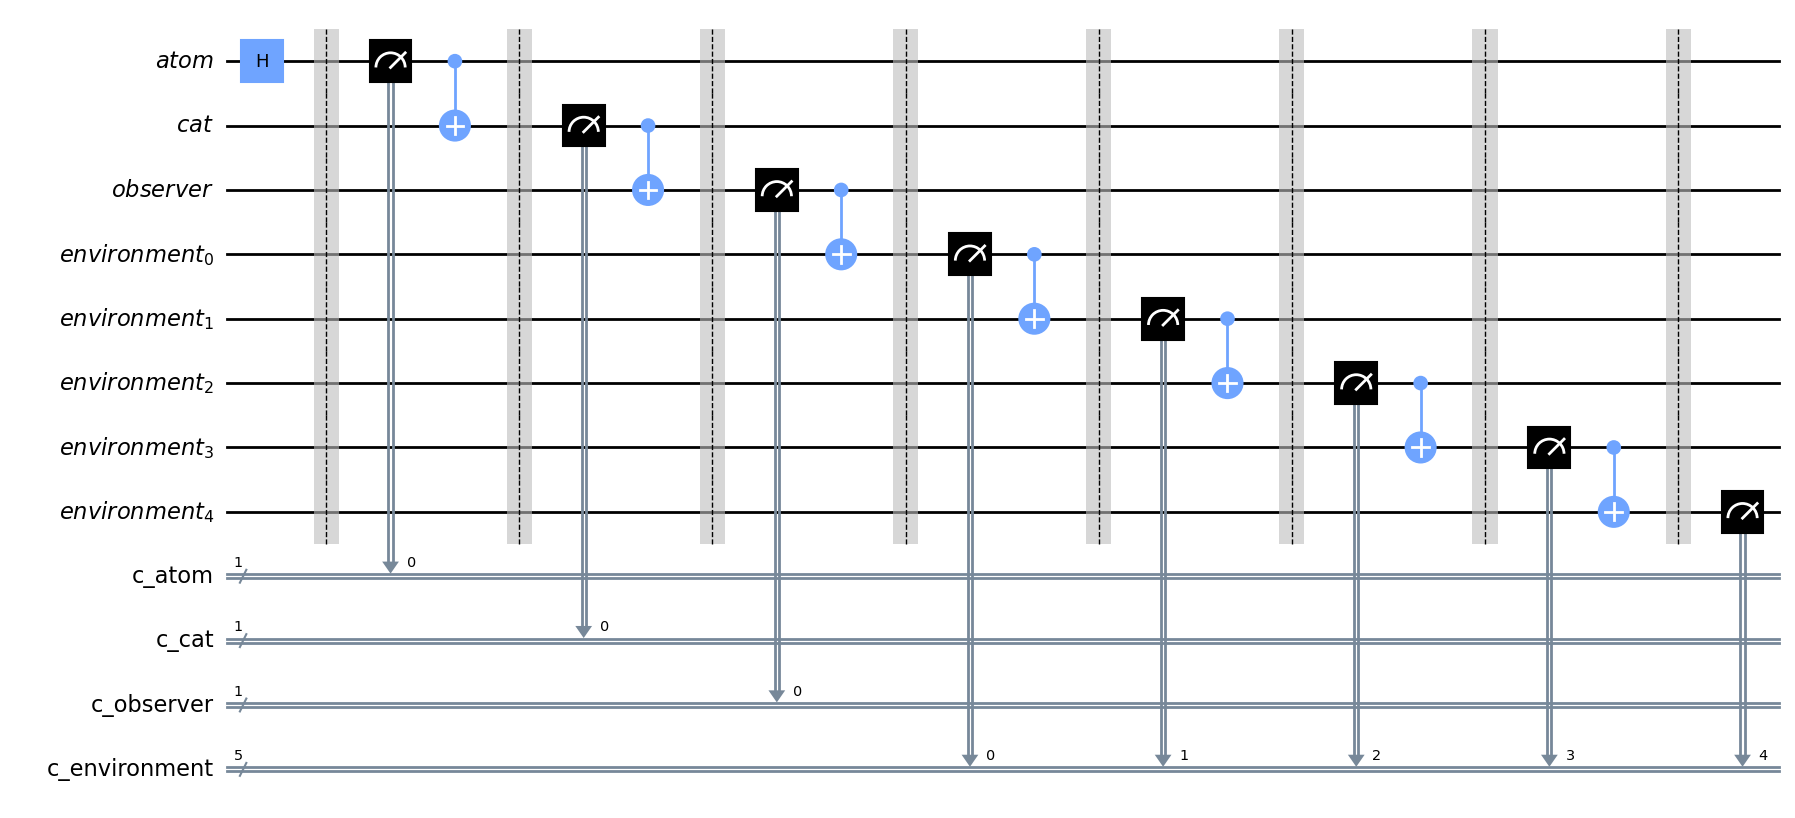

In [12]:
qc.draw("mpl")

The measurement outcomes are the same as what we would see without the measurements before the CNOT gates, i.e., all 0 or all 1: 

In [13]:
result = backend.run(qc).result()

print(result.get_counts())

{'11111 1 1 1': 506, '00000 0 0 0': 518}


### The indistinguishability of collapse and no-collapse

When we don't have quantum control over the environment, the state of the atom, cat and observer subsystem is mathematically the same as if it underwent an irreversible collapse. If you are familiar with density matrices, you can prove this yourself by showing the density matrix of the atom, cat and observer qubits in the no-collapse and collapse cases is the same:

$$\frac{1}{2}(|000\rangle \langle 000| + |111\rangle \langle 111|)$$

In quantum computing, this equivalence is related to the principle of deferred measurement. According to this principle, moving measurements from before the controls on the CNOTs to after the CNOTs makes no difference to the distribution of measurement outcomes. You can see from our no-collapse and collapse quantum circuits that they are equivalent up to the shifting of measurements through the CNOT gates. 

This equivalence between quantum states after decoherence and quantum states after irreversible collapse leads to a very common misconception, which is to label collapse and no- collapse as mere philosophical interpretations of quantum theory, without any observable differences. In the next installment of the series, I’ll explain an important thought experiment which demonstrates a contradiction in the naïve application of the idea that observation causes collapse — a thought experiment that also happens to have played an important role in the birth of quantum computing. It's called Wigner's friend. 

I hope you've enjoyed resolving the paradox of Schrödinger's cat using quantum circuits, where we've seen that large superpositions are actually self-consistent, and have the same effect on Schrodinger's cat as an irreversible measurement. 

Keep an eye on the Qiskit YouTube channel and blog for more paradox busting! 